In [31]:
from pytket_mbqc_py.qubit_manager import QubitManager
from pytket_mbqc_py.graph_circuit import GraphCircuit
from pytket_mbqc_py.wasm_file_handler import get_wasm_file_handler
from pytket.unit_id import BitRegister
from pytket.extensions.quantinuum import QuantinuumBackend, QuantinuumAPIOffline
import networkx as nx
from pytket.circuit.display import render_circuit_jupyter
import numpy as np

In [11]:
circuit = GraphCircuit(n_qubits_total=6)
circuit.add_input_vertex()
circuit.add_graph_vertex()
circuit.vertex_qubit[1].index

[1]

In [14]:
circuit = GraphCircuit(n_qubits_total=6)
index_dict = {}


for i in range(6):
    if i == 0:
        qubit_one, index_dict[f"index_{i}"] = circuit.add_input_vertex()
    elif i == 5:
        index_dict[f"index_{i}"] = circuit.add_output_vertex()
    else:
        index_dict[f"index_{i}"] = circuit.add_graph_vertex()


index_dict


{'index_0': 0,
 'index_1': 1,
 'index_2': 2,
 'index_3': 3,
 'index_4': 4,
 'index_5': 5}

In [16]:
keys = sorted(index_dict.keys())
for i in range(1, len(keys)):
    key_i = keys[i]
    key_i_minus_1 = keys[i - 1]
    vertex_i = index_dict[key_i]
    vertex_i_minus_1 = index_dict[key_i_minus_1]
    circuit.add_edge(vertex_i_minus_1, vertex_i)


Qubit index 1: q[0] and 2 is q[1]
Qubit index 1: q[1] and 2 is q[2]
Qubit index 1: q[2] and 2 is q[3]
Qubit index 1: q[3] and 2 is q[4]
Qubit index 1: q[4] and 2 is q[5]


In [17]:
keys = sorted(index_dict.keys())
for i in range(len(keys)-1):   
    vertex_i = index_dict[keys[i]]
    print(vertex_i)
    circuit.corrected_measure(vertex=vertex_i)

0
1
2
3
4


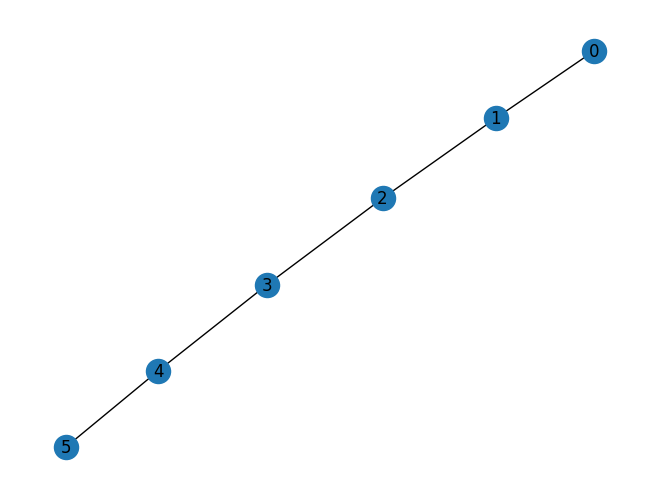

In [18]:
nx.draw(circuit.graph, with_labels=True)

In [19]:
circuit.correct_outputs()
output_reg = BitRegister(name="output", size=1)
circuit.add_c_register(register=output_reg)


BitRegister("output", 1)

In [20]:
circuit.Measure(qubit=circuit.output_qubits[5], bit=output_reg[0])


[WASM _w[0]; SetBits(000) index[0], index[1], index[2]; SetBits(0) init_t_mult_0[0]; SetBits(0) init_t_mult_1[0]; SetBits(0) init_t_mult_2[0]; SetBits(0) init_t_mult_3[0]; SetBits(0) init_t_mult_4[0]; SetBits(0) init_t_mult_5[0]; SetBits(0) meas_0[0]; SetBits(0) meas_1[0]; SetBits(0) meas_2[0]; SetBits(0) meas_3[0]; SetBits(0) meas_4[0]; SetBits(0) meas_5[0]; Reset q[1]; Reset q[2]; Reset q[3]; Reset q[4]; Reset q[5]; SetBits(0) x_corr_0[0]; SetBits(0) x_corr_1[0]; SetBits(0) x_corr_2[0]; SetBits(0) x_corr_3[0]; SetBits(0) x_corr_4[0]; SetBits(0) x_corr_5[0]; SetBits(0) z_corr_0[0]; SetBits(0) z_corr_1[0]; SetBits(0) z_corr_2[0]; SetBits(0) z_corr_3[0]; SetBits(0) z_corr_4[0]; SetBits(0) z_corr_5[0]; SetBits(0) init_t_mult_0[0]; SetBits(0) init_t_mult_1[0]; SetBits(0) init_t_mult_2[0]; SetBits(0) init_t_mult_3[0]; SetBits(0) init_t_mult_4[0]; H q[1]; H q[2]; H q[3]; H q[4]; H q[5]; WASM init_t_mult_0[0], index[0], index[1], index[2], _w[0]; CZ q[0], q[1]; SetBits(100) index[0], index[1

In [21]:
api_offline = QuantinuumAPIOffline()
backend = QuantinuumBackend(device_name="H1-1LE", api_handler=api_offline)
compiled_circuit = backend.get_compiled_circuit(circuit)

In [23]:
backend = QuantinuumBackend(
    device_name="H1-1LE", api_handler=QuantinuumAPIOffline()
)
compiled_circuit = backend.get_compiled_circuit(circuit)
n_shots = 100

In [25]:
result = backend.run_circuit(
    circuit=compiled_circuit,
    n_shots=n_shots,
    wasm_file_handler=get_wasm_file_handler(),
)

In [35]:
values = result.get_counts(output_reg).values()
values_array = np.array(list(values))
total = np.sum(values_array)
normalized_values = values_array / total
normalized_values

array([0.46, 0.54])

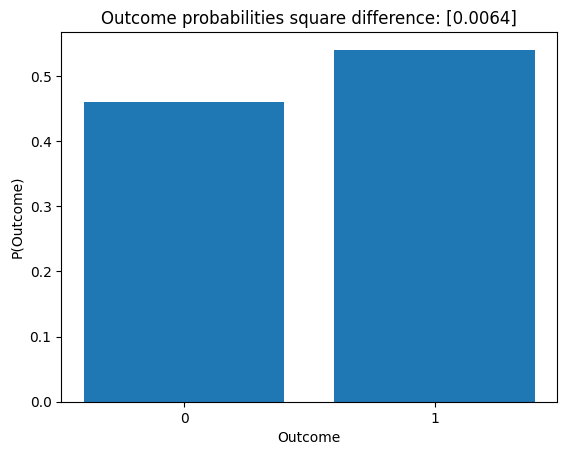

In [43]:
import matplotlib.pyplot as plt

# Your data
data = np.array([0.46, 0.54])
abs_diff = np.diff(data)**2

# Create an array with the positions of each bar along the x-axis
x_pos = np.arange(len(data))
plt.bar(x_pos, data)
tick_names = ['0', '1']
plt.xticks(x_pos, tick_names)
plt.xlabel('Outcome')
plt.ylabel('P(Outcome)')    
plt.title(f'Outcome probabilities square difference: {abs_diff}')
plt.show()